## Introduction
The Dataset provides living area and conservation status. There are 218 observations and 16 variables.

### Objective
Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. As a datascientist, we have to help **Tony** to determine the best model to predict and redeﬁne new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.


### The Steps:
1. Import Dataset: Load the dataset. 
2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range) 
3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem. 
4. Variable Selection: Choose the variable and its reason. 
5. Modelling: Create models using Regression 
6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

## Part I - Follow the Steps

In [1]:
#import libraries
import numpy as np
import pandas as pd

#import libraries for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### 1. Import Dataset: Load the dataset. 

In [107]:
data=pd.read_csv('victoria.csv')
data=data.drop(['row.labels'],axis=1)
data.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,228000.0,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,409000.0,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,200000.0,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,180000.0,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,443600.0,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


#### Redeﬁne new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A

In [108]:
a = {'2B':'C','3A':'C','2A':'B','1A':'A'}
data['conservation'] = data['conservation'].replace(a)
data.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,228000.0,7530999756,Z45,4B,33,3,5,E100,C,1,0,1,S3,3A,0
1,409000.0,1006500015,Z31,3B,5,7,5,E50,A,2,1,1,S5,4A,1
2,200000.0,8887000275,Z52,3A,14,8,5,E50,A,2,0,1,S2,3A,0
3,180000.0,6261000061,Z62,4A,41,3,4,E50,B,1,0,0,S3,1A,0
4,443600.0,1461499939,Z31,3A,22,6,7,E100,A,2,0,1,S4,4A,1


Data diatas, memiliki definisi 'conservation' berbeda dari sebelumnya. Yaitu A = 1A, B = 2A, C = 2B and 3A. 

### 2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)

In [102]:
data.describe()

,totalprice,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,280741.523853,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,69298.459358,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,155000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,228500.000000,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,269750.000000,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,328625.000000,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,560000.000000,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


Using data.describe()  to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 15 columns):
totalprice        218 non-null float64
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: float64(1), int64(7), object(7)
memory usage: 25.6+ KB


Using data.info() to prints information about a DataFrame including : the index dtype and column dtypes, non-null values and memory usage.

### 3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem. 

Now, we can make split variable for categorical data and numerical data

In [109]:
categorical=data[['area','zone','category','out','conservation','streetcategory','heating']]
numerical=data.drop(categorical,axis=1)
numerical.head()

,totalprice,age,floor,rooms,toilets,garage,elevator,tras
0,228000.0,33,3,5,1,0,1,0
1,409000.0,5,7,5,2,1,1,1
2,200000.0,14,8,5,2,0,1,0
3,180000.0,41,3,4,1,0,0,0
4,443600.0,22,6,7,2,0,1,1


In [11]:
categorical.head()

,area,zone,category,out,conservation,streetcategory,heating
0,7530999756,Z45,4B,E100,C,S3,3A
1,1006500015,Z31,3B,E50,A,S5,4A
2,8887000275,Z52,3A,E50,A,S2,3A
3,6261000061,Z62,4A,E50,B,S3,1A
4,1461499939,Z31,3A,E100,A,S4,4A


In [13]:
categorical.describe()

,area,zone,category,out,conservation,streetcategory,heating
count,218,218,218,218,218,218,218
unique,207,23,7,4,3,4,4
top,1303699951,Z41,3B,E100,A,S3,3A
freq,2,18,77,122,161,107,149


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

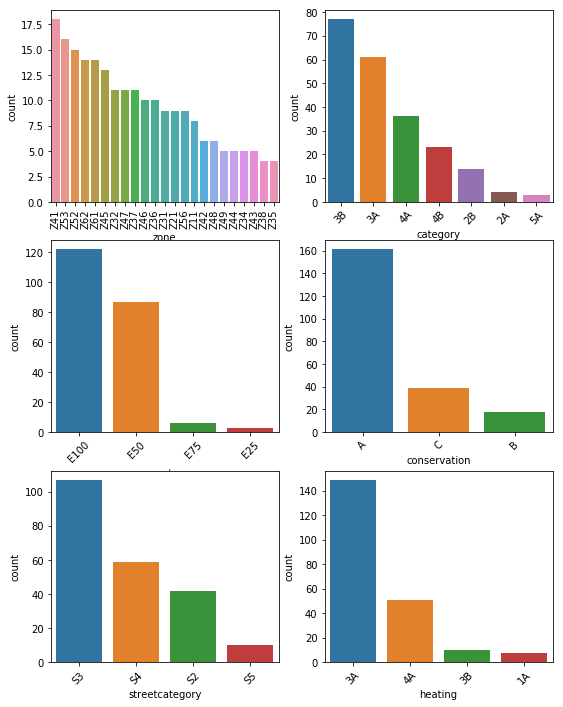

In [14]:
# plot categorical data

plt.figure(figsize=(9,12))

a=plt.subplot(3,2,1)
sns.countplot(categorical['zone'],order=categorical['zone'].value_counts().index)
plt.xticks(rotation=90)

a=plt.subplot(3,2,2)
sns.countplot(categorical['category'],order=categorical['category'].value_counts().index)
plt.xticks(rotation=45)

a=plt.subplot(3,2,3)
sns.countplot(categorical['out'],order=categorical['out'].value_counts().index)
plt.xticks(rotation=45)

a=plt.subplot(3,2,4)
sns.countplot(categorical['conservation'],order=categorical['conservation'].value_counts().index)
plt.xticks(rotation=45)


a=plt.subplot(3,2,5)
sns.countplot(categorical['streetcategory'],order=categorical['streetcategory'].value_counts().index)
plt.xticks(rotation=45)

a=plt.subplot(3,2,6)
sns.countplot(categorical['heating'],order=categorical['heating'].value_counts().index)
plt.xticks(rotation=45)

Dari barplots diatas kita dapat menarik kesimpulan bahwa : 
1. Tiga zona terbanyak adalah Z41, Z53, dan Z52
2. Tiga category terbanyak adalah 3B, 3A, dan 4A
3. Status conservation terbanyak adalah Conversion A, Streetcategory terbanyak adalah S3, dan heating terbanyak adalah Tipe 3A. 

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


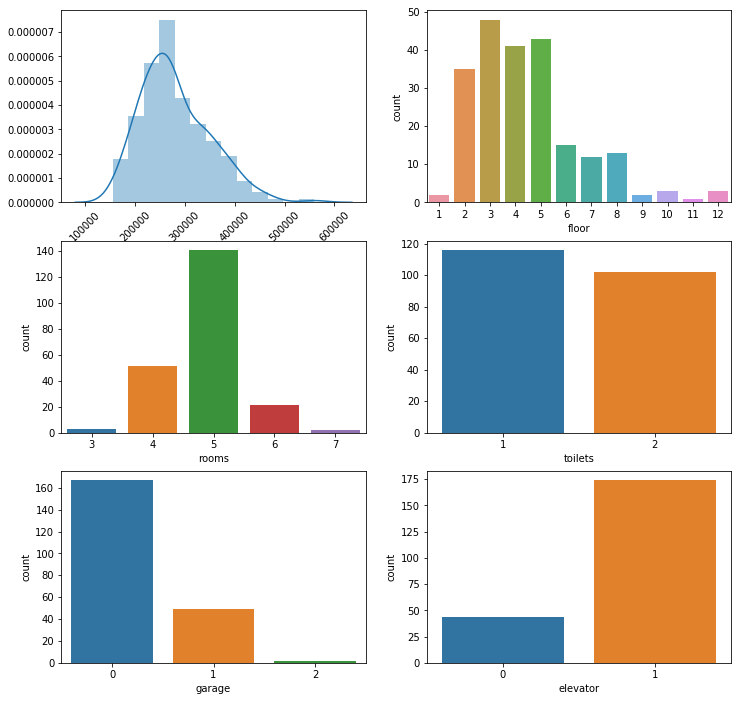

In [15]:
# plot numerical data : totalprice, floor, rooms, toilets, garage, elevator

plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
sns.distplot(numerical['totalprice'])
plt.xticks(rotation=45)

plt.subplot(3,2,2)
sns.countplot(numerical['floor'])

plt.subplot(3,2,3)
sns.countplot(numerical['rooms'])

plt.subplot(3,2,4)
sns.countplot(numerical['toilets'])

plt.subplot(3,2,5)
sns.countplot(numerical['garage'])

plt.subplot(3,2,6)
sns.countplot(numerical['elevator'])


Dari gambar diatas, kita mendapatkan **insights**:
1. Dari data apartemen yang kita miliki, apartemen memiliki harga yang bervariasi dan datanya dapat disebut cukup menyebar normal. 
2. Data apartemen yang kita miliki kebanyakan berada pada lantai 2 sampai dengan lantai 8 .
3. Jumlah kamar paling banyak dari apartemen adalah 5 kamar, dan semuanya memiliki toilet yang jumlahnya ada yang memiliki 1 toilet, dan 2 toilet. 
4. Kebanyakan dari apartemen tidak memiliki garasi, dan hampir semuanya dapat diakses oleh elevator. 
    

### 4. Variable Selection: Choose the variable and its reason.

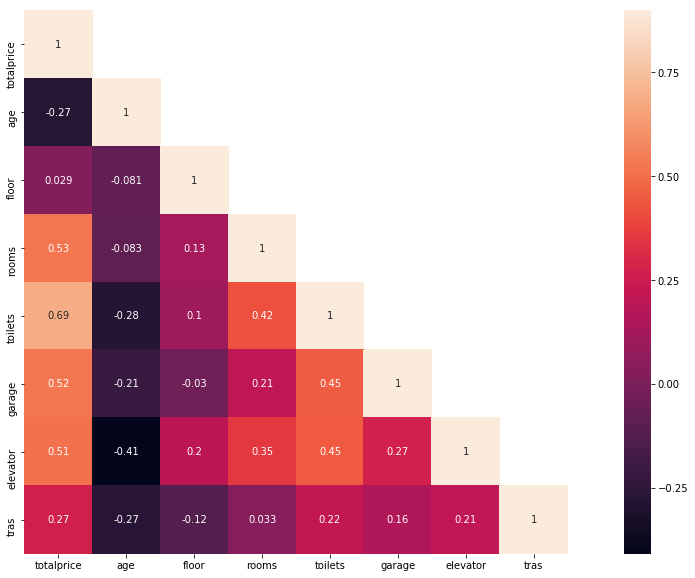

In [16]:
#create correlation with hitmap

#create correlation
corr = numerical.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

As we can see from the heatmap above, total price has good correlation in rooms, toilets, garage, and elevator. Correlation >= 0.50. Now, I try to making dummy variables for categorical data, except for area and zone. 

In [23]:
categorical=categorical.drop(['area','zone'],axis=1)
categorical_dummy=pd.get_dummies(categorical)
categorical_dummy['totalprice']=data['totalprice']

In [24]:
categorical_dummy.head()

,category_2A,category_2B,category_3A,category_3B,category_4A,category_4B,category_5A,out_E100,out_E25,out_E50,...,conservation_C,streetcategory_S2,streetcategory_S3,streetcategory_S4,streetcategory_S5,heating_1A,heating_3A,heating_3B,heating_4A,totalprice
0,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,228000.0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,409000.0
2,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,200000.0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,180000.0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,443600.0


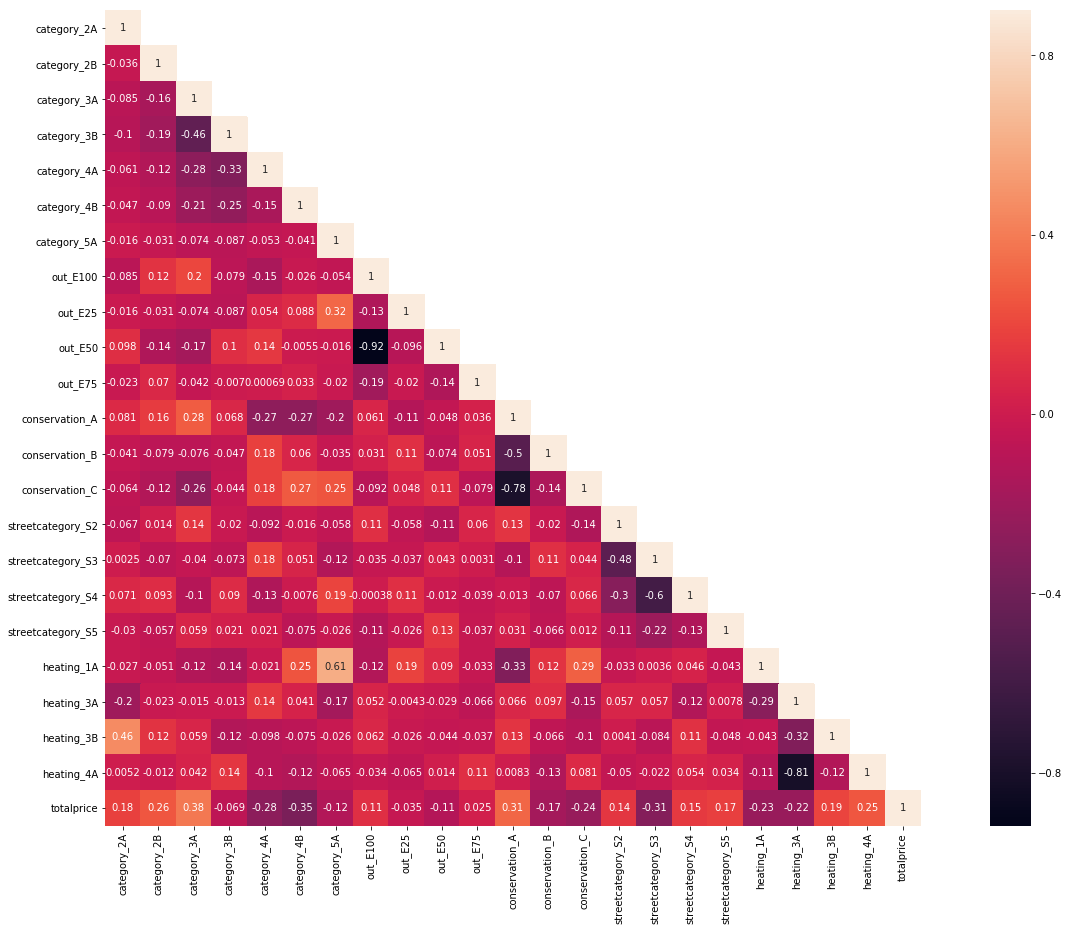

In [25]:
#create correlation with hitmap

#create correlation with spearman method
corr = categorical_dummy.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(25,15)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

As we can see totalprice has no good correlation with categorical data. Then, we can create a model using variables : rooms, toilets, garage, and elevator

### 5. Modelling: Create models using Regression

#### Multiple Linear Regression 

In [110]:
# Making a new table for modelling regression 
a=numerical[['age','floor','tras']]
datareg=numerical.drop(a,axis=1)
datareg.head()

,totalprice,rooms,toilets,garage,elevator
0,228000.0,5,1,0,1
1,409000.0,5,2,1,1
2,200000.0,5,2,0,1
3,180000.0,4,1,0,0
4,443600.0,7,2,0,1


In [111]:
#multiple linear regression
X=datareg.iloc[:,1:5].values
y=datareg.iloc[:,0].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

### Manual testing 
Let say room1 has specification : 
- number of rooms : 5
- number of toilets : 2
- is there a garage : 1 (yes)
- can be accessed by elevator : 1 (yes)


In [80]:
room1 = [[5, 2, 1, 1]]
priceroom1 = regressor.predict(room1)
print('Price of Room 1 is $ %.2f' %priceroom1)

Price of Room 1 is $ 348950.94


Dari model yang telah dibuat, room1 sebagai dummyroom yang kita buat, ternyata dapat diberikan harga $ 348950.94

#### Get the result from x_test data

In [112]:
result = pd.DataFrame([y_test,y_pred])
result= result.T
pd.DataFrame(result)
result=result.rename(columns={0:'y_test', 1:'y_pred'})
result.head()

,y_test,y_pred
0,236000.0,258162.032903
1,296000.0,310525.154789
2,282000.0,310525.154789
3,253500.0,258162.032903
4,390000.0,348950.937728


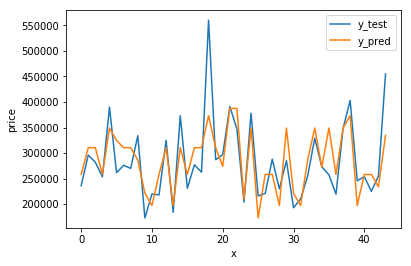

In [113]:
# Using Lineplot to overviewing the 
label = {'y_test','y_pred'}
plt.plot(result)
plt.xlabel('x')
plt.ylabel('price')
plt.legend(label)
plt.show()

In [114]:
# Making a column error_price using abs(y_pred-y_test)
result['error_price']=abs(y_pred-y_test)
result.head()

,y_test,y_pred,error_price
0,236000.0,258162.032903,22162.032903
1,296000.0,310525.154789,14525.154789
2,282000.0,310525.154789,28525.154789
3,253500.0,258162.032903,4662.032903
4,390000.0,348950.937728,41049.062272


In [115]:
# finding descriptive from error_price
result.error_price.describe()

count        44.000000
mean      36513.568418
std       32641.933441
min         637.991769
25%       20785.565463
50%       30568.657138
75%       41519.396620
max      186823.254662
Name: error_price, dtype: float64

Dari column error_price, maksimum error nya masih cukup besar, yaitu  USD 186823.25, 
sedangkan minimum error nya sudah cukup kecil hanya USD 637.99. 

(array([-50000.,      0.,  50000., 100000., 150000., 200000.]),
 <a list of 6 Text xticklabel objects>)

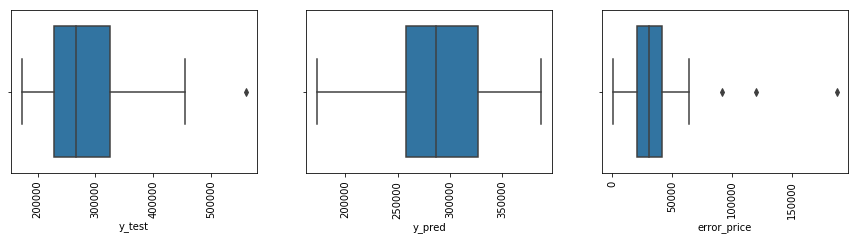

In [116]:
# Making boxplot from y_test,y_pred, and error_price

plt.figure(figsize=(15,3))

a=plt.subplot(1,3,1)
sns.boxplot(x=result['y_test'])
plt.xticks(rotation=90)

a=plt.subplot(1,3,2)
sns.boxplot(x=result['y_pred'])
plt.xticks(rotation=90)

a=plt.subplot(1,3,3)
sns.boxplot(x=result['error_price'])
plt.xticks(rotation=90)

### 6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

In [51]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [66]:
#checking the error
print(f'MAE  Value {mean_absolute_error(y_pred, y_test)}')
print(f'MAPE Value {mean_absolute_percentage_error(y_test, y_pred)})')

MAE  Value 36513.56841832581
MAPE Value 12.659920046160805)


## Part II - More we Explore, More we Get the Insights

From the previous model, we only used variables : rooms, toilets, garage, and elevator. Which has correlation >= 0.5 with total price. Then, if we use variables that has correlation >= 0.2 with total price *maybe* we will get another price_pred. 

Categorical data used for the model are : category_2A, category_2B, category_3A, conservation_A, streetcategory_S5, heating_3B, and heating_4A. Then Numerical data used for the model are : rooms, toilets, garage, elevator, and tras.

In [88]:
#making new table datareg
a=categorical_dummy[['category_2A', 'category_2B', 'category_3A', 'conservation_A','streetcategory_S5','heating_3B','heating_4A','totalprice']]
datareg=numerical.iloc[:,3:8]
datareg['totalprice']=numerical['totalprice']

datareg=pd.merge(a,datareg)

In [89]:
datareg.head()

,category_2A,category_2B,category_3A,conservation_A,streetcategory_S5,heating_3B,heating_4A,totalprice,rooms,toilets,garage,elevator,tras
0,0,0,0,0,0,0,0,228000.0,5,1,0,1,0
1,0,0,0,0,0,0,0,228000.0,5,1,0,1,1
2,0,0,0,1,0,0,0,228000.0,5,1,0,1,0
3,0,0,0,1,0,0,0,228000.0,5,1,0,1,1
4,0,0,0,1,1,0,1,409000.0,5,2,1,1,1


In [97]:
#multiple linear regression
p=datareg[['totalprice']]
q=datareg.drop(p,axis=1)

X=q.iloc[:,0:12].values
y=datareg['totalprice'].values


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [98]:
result = pd.DataFrame([y_test,y_pred])
result= result.T
pd.DataFrame(result)
result=result.rename(columns={0:'y_test', 1:'y_pred'})
result.head()

,y_test,y_pred
0,348000.0,354211.367303
1,204000.0,255463.425007
2,308000.0,270210.362617
3,231000.0,250692.670727
4,232400.0,265308.908891


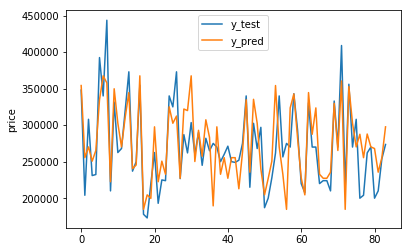

In [101]:
# Using Lineplot to overviewing the 
label = {'y_test','y_pred'}
plt.plot(result)
plt.ylabel('price')
plt.legend(label)
plt.show()

In [100]:
#checking the error
print(f'MAE  Value {mean_absolute_error(y_pred, y_test)}')
print(f'MAPE Value {mean_absolute_percentage_error(y_test, y_pred)})')

MAE  Value 27599.184420167825
MAPE Value 10.44486490042634)


### Insight : 
- Model 1 : Using variables rooms, toilets, garage, and elevator we got Price_Predicted with MAE Value 36513.56 and MAPE Value 12.65. 
- Model 2 : Using variables from Categorical data which are category_2A, category_2B, category_3A, conservation_A, streetcategory_S5, heating_3B, and heating_4A. Then Numerical data used for the model are : rooms, toilets, garage, elevator, and tras, we got Price_Predicted with MAE Value 27599.18 and MAPE Value 10.44.

Conclussion:  Model 2 greater than model 2. Then, **Tony** who has profession as a broker can predict apartment price in Victoria based on Model 2. 